# COVID-19 Cases Analysis

## Preprocessing the Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Excel file into a Pandas DataFrame
import pandas as pd
file_path = r'C:\Users\sankar\Desktop\Covid_19_cases4.xlsx'

# Load the Excel file into a Pandas DataFrame
data = pd.read_excel(file_path)
print(data)

        dateRep  day  month  year  cases  deaths countriesAndTerritories
0    2021-05-31   31      5  2021    366       5                 Austria
1    2021-05-30   30      5  2021    570       6                 Austria
2    2021-05-29   29      5  2021    538      11                 Austria
3    2021-05-28   28      5  2021    639       4                 Austria
4    2021-05-27   27      5  2021    405      19                 Austria
...         ...  ...    ...   ...    ...     ...                     ...
2725 2021-03-06    6      3  2021   3455      17                  Sweden
2726 2021-03-05    5      3  2021   4069      12                  Sweden
2727 2021-03-04    4      3  2021   4884      14                  Sweden
2728 2021-03-03    3      3  2021   4876      19                  Sweden
2729 2021-03-02    2      3  2021   6191      19                  Sweden

[2730 rows x 7 columns]


In [2]:
# Creating copy of original data
cdata=data.copy()

In [3]:
# Structure of the dataset
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  2730 non-null   datetime64[ns]
 1   day                      2730 non-null   int64         
 2   month                    2730 non-null   int64         
 3   year                     2730 non-null   int64         
 4   cases                    2730 non-null   int64         
 5   deaths                   2730 non-null   int64         
 6   countriesAndTerritories  2730 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 149.4+ KB


In [4]:
# Summary of numerical variables
summary_num = cdata.describe()
print(summary_num) 

               day        month    year         cases       deaths
count  2730.000000  2730.000000  2730.0   2730.000000  2730.000000
mean     16.000000     4.010989  2021.0   3661.010989    65.291941
std       8.765919     0.818813     0.0   6490.510073   113.956634
min       1.000000     3.000000  2021.0  -2001.000000    -3.000000
25%       8.000000     3.000000  2021.0    361.250000     2.000000
50%      16.000000     4.000000  2021.0    926.500000    14.500000
75%      24.000000     5.000000  2021.0   3916.250000    72.000000
max      31.000000     5.000000  2021.0  53843.000000   956.000000


In [5]:
#Summary of categorical variables
summary_cate = cdata.describe(include = "O")
print(summary_cate)

       countriesAndTerritories
count                     2730
unique                      30
top                    Austria
freq                        91


In [6]:
# Removing duplicate records
cdata.drop_duplicates(keep='first',inplace=True)

In [7]:
# Check for missing values             
cdata.isnull()                 
print('Data columns with null values:\n', cdata.isnull().sum())

Data columns with null values:
 dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
dtype: int64


## Calculating Means and Standard Deviations

In [8]:
# Calculate mean and standard deviation
mean_cases = data['cases'].mean()
mean_deaths = data['deaths'].mean()
std_cases = data['cases'].std()
std_deaths = data['deaths'].std()

# Calculate correlations
correlation = data['cases'].corr(data['deaths'])

# Print the results
print(f"Mean Cases: {mean_cases}")
print(f"Mean Deaths: {mean_deaths}")
print(f"Standard Deviation Cases: {std_cases}")
print(f"Standard Deviation Deaths: {std_deaths}")
print(f"Correlation between Cases and Deaths: {correlation}")

Mean Cases: 3661.010989010989
Mean Deaths: 65.29194139194139
Standard Deviation Cases: 6490.510073102111
Standard Deviation Deaths: 113.95663405806982
Correlation between Cases and Deaths: 0.7663088786576355


## Visualization 

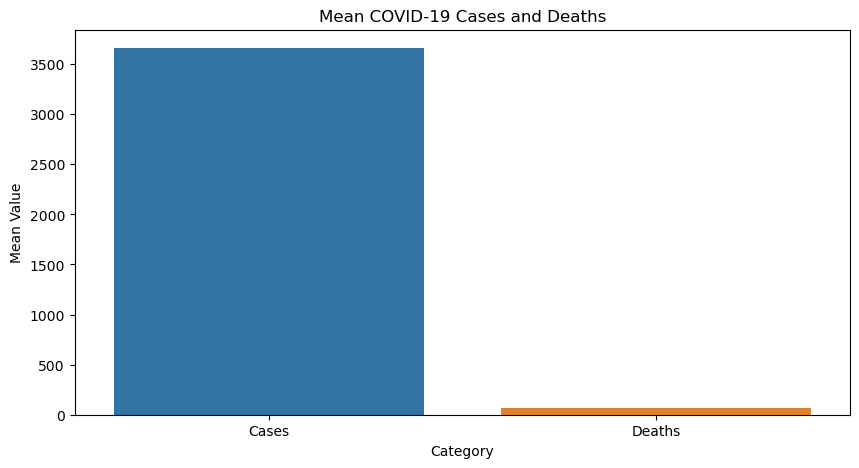

In [9]:
# Create a bar chart to compare means
plt.figure(figsize=(10, 5))
sns.barplot(x=['Cases', 'Deaths'], y=[mean_cases, mean_deaths])
plt.title('Mean COVID-19 Cases and Deaths')
plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.show()

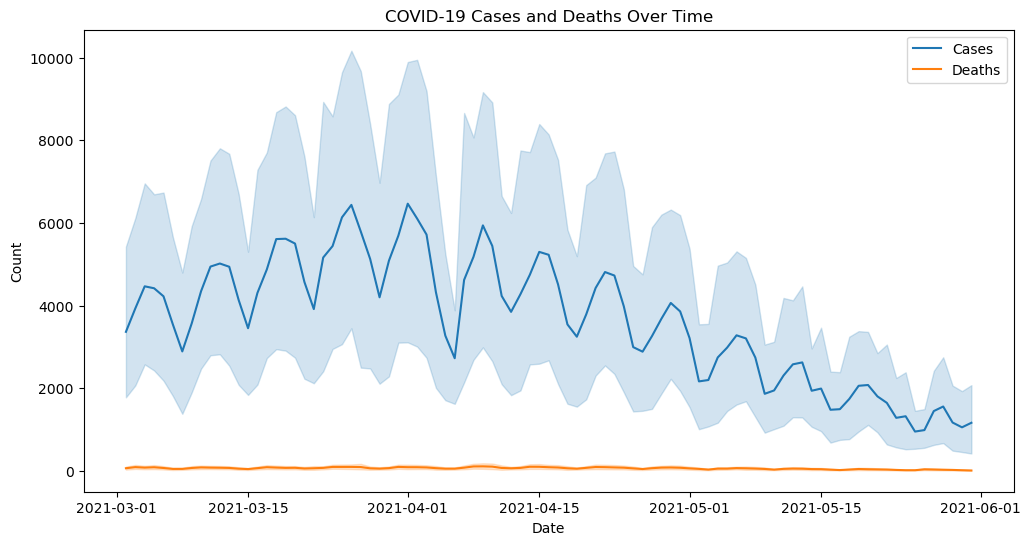

In [10]:
# Create line charts to visualize trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='dateRep', y='cases', data=data, label='Cases')
sns.lineplot(x='dateRep', y='deaths', data=data, label='Deaths')
plt.title('COVID-19 Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

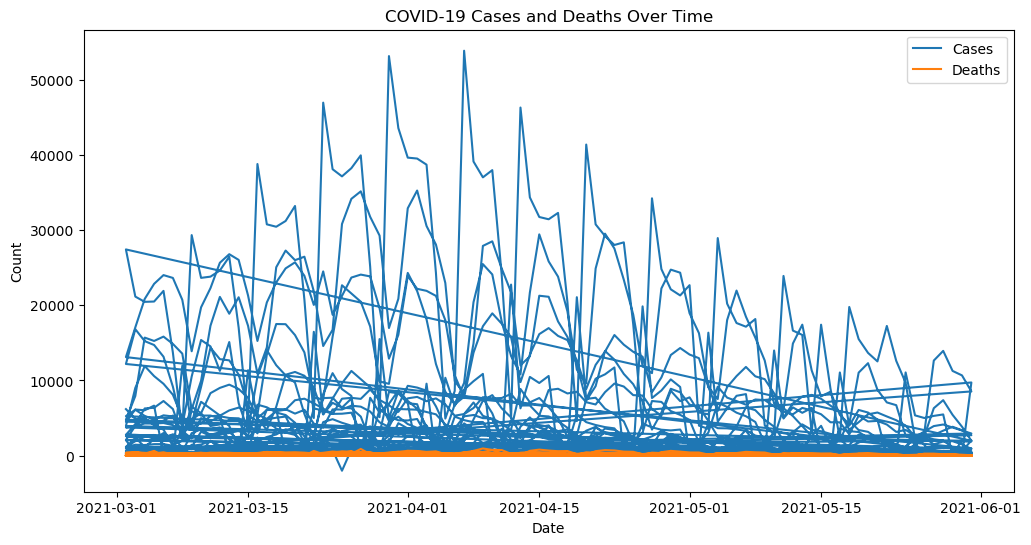

In [11]:
# Convert dateRep to a datetime object
data['dateRep'] = pd.to_datetime(data['dateRep'], format='%d/%m/%Y')

# Create a time series plot for cases and deaths
plt.figure(figsize=(12, 6))
plt.plot(data['dateRep'], data['cases'], label='Cases')
plt.plot(data['dateRep'], data['deaths'], label='Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Cases and Deaths Over Time')
plt.legend()
plt.show()